# Imports

In [1]:
import os
os.chdir("D:\PulpitE\FPL_ML")

In [2]:
import pandas as pd

# Data

In [3]:
preds_fwd = pd.read_csv("predictions/predictions_fwd.csv")

In [18]:
preds_fwd['H/A'] = np.where(preds_fwd['Was Home'] == 1, 'H', 'A')

In [19]:
preds_fwd.columns

Index(['Unnamed: 0', 'Name', 'GW', 'Opponent', 'Was Home', 'Total Points',
       'Points', 'H/A'],
      dtype='object')

# Plot table

In [5]:
%load_ext autoreload
%autoreload 2

from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

import plottable
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.formatters import decimal_to_percent
from plottable.plots import circled_image # image

In [6]:
cols = [
    "Name",
    "Opponent",
    "Points"
]

df = preds_fwd

In [7]:
colnames = [
    "Name",
    "Opponent",
    "Predicted points"
]

col_to_name = dict(zip(cols, colnames))

In [8]:
# flag_paths = list(Path("country_flags").glob("*.png"))
# country_to_flagpath = {p.stem: p for p in flag_paths}

In [9]:
# df[["spi", "global_o", "global_d"]] = df[["spi", "global_o", "global_d"]].round(1)

# df = df.rename(col_to_name, axis=1)
# df = df.drop("Points", axis=1)
# df.insert(0, "Flag", df["Team"].apply(lambda x: country_to_flagpath.get(x)))

# df = df.set_index("Team")

In [10]:
df = df[cols]
df = df.set_index("Name")

In [11]:
val_min = min(df["Points"])
val_max = max(df["Points"])

In [12]:
cmap = LinearSegmentedColormap.from_list(
    name="points_cmap", colors=["#ffffff", "#f2fbd2", "#c9ecb4", "#93d3ab", "#35b0ab"], N=512
)

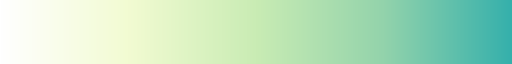

In [13]:
cmap

In [14]:
col_defs = (
    [
        ColumnDefinition(
            name="Name",
            textprops={"ha": "center", "weight": "bold"},
            width=0.5,
        ),
        ColumnDefinition(
            name="Opponent",
            textprops={"ha": "left"},
            width=1.5,
        ),
        ColumnDefinition(
            name="Points",
            textprops={"ha": "center"},
            width=0.75,
            cmap=normed_cmap(df["Points"], cmap=cmap)
        )
    ]
)

In [15]:
plt.rcParams["font.family"] = ["DejaVu Sans"]
plt.rcParams["savefig.bbox"] = "tight"

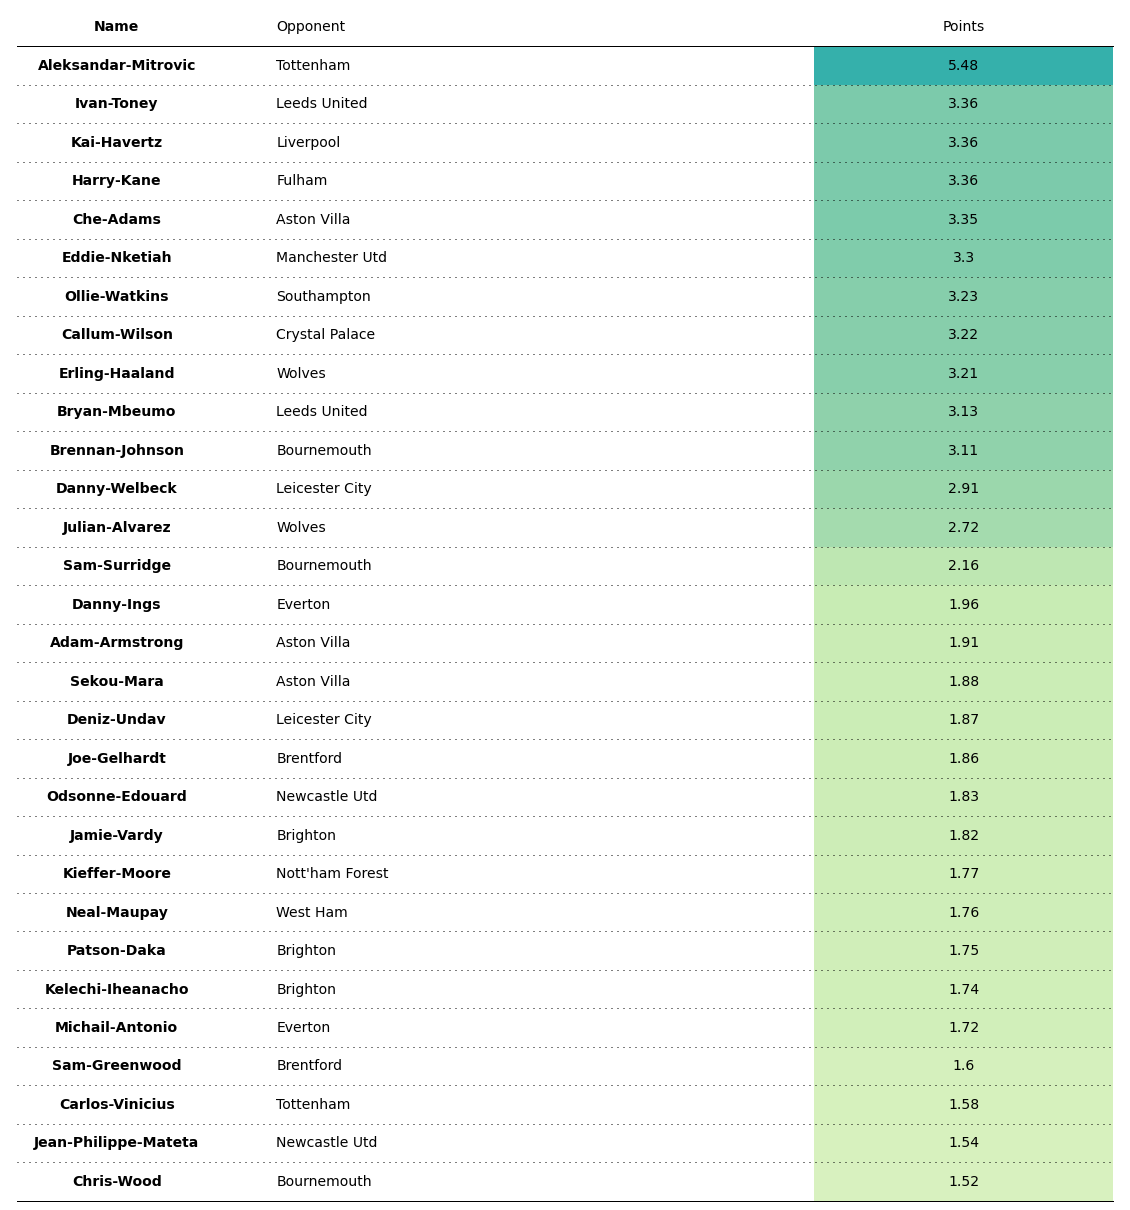

In [16]:
fig, ax = plt.subplots(figsize=(20, 22))

table = Table(
    df,
    column_definitions=col_defs,
    row_dividers=True,
    footer_divider=True,
    ax=ax,
    textprops={"fontsize": 14},
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": 1, "linestyle": "-"},
)